In [1]:
import tensorflow as tf
import scipy.io as sio 
import numpy as np
import pandas as pd
#import tensorflow as tf
#from keras import Model
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Input, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model

from tensorflow.python.client import device_lib

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
    
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU' or x.device_type == 'CPU']



i=sio.loadmat('inputFeatures.mat')
print(sorted(i.keys()))

TTest=i['TTest']
#print(TTest)

print("TTest:",TTest.shape)
#print(TTest)
#print(type(TTest))

TTrain=i['TTrain']
print("TTrain:",TTrain.shape)
# print(TTrain)

XTrain=i['XTrain']
print("XTrain:",XTrain.shape)
#print(XTrain)
#print(type(XTrain))

XTest=i['XTest']
print("XTest:",XTest.shape)
# print(XTest)
# print(type(XTest))

# XTrain=XTrain.reshape(-1)
# TTrain=TTrain.reshape(-1)
# XTest=XTest.reshape(-1)
# TTest=TTest.reshape(-1)

#print(XTrain)

#column_series = pd.DataFrame(np.array(XTrain))
#print(column_series[0])


# data=np.transpose(np.array(XTrain[0]))
# data1=np.transpose(np.array(XTrain[1]))
# test=np.stack((data,data1),axis=0)
# data2=np.transpose(np.array(XTrain[2]))
# a=[]
# a.append(data)
# a.append(data1)
# a.append(data2)
# #print(a)
# a=np.stack(a)
#print(a)
#print(a.shape)


##________________________________________TEST
test=np.transpose(XTrain).reshape(-1)
test2=np.transpose(XTest).reshape(-1)

#print(test)
list_test=[]
for i in range(len(test)):
    test[i]=np.transpose(np.array(test[i]))
    list_test.append(test[i])

for j in range(len(test2)):  
    test2[j]=np.transpose(np.array(test2[j]))
    list_test.append(test2[j])  
    
list_test=np.vstack(list_test)
scaler = StandardScaler()
scaler=scaler.fit(list_test)
scaled_list_test=scaler.transform(list_test)
print(scaled_list_test)
print(scaled_list_test.shape)

# XTrain_s=scaled_list_test[:-340*50]
# XTest_s=scaled_list_test[-340*50:]
# print(len(XTest_s))
# print(len(XTrain_s))

##________________________________________BKU
# df=pd.DataFrame(list_test)
# df.columns = ['C1','C2','C3','C4']
# print(df)
# normalized_df=(df-df.mean())/df.std()
# #print(normalized_df.shape)
#________________________________________
#print(normalized_df)
#normalized_df=normalized_df.to_numpy()

# FOR 2D INPUT - RESHAPE TO 3D AS BELOW
#normalized_df=normalized_df.reshape(67950,1,4)
#print(normalized_df)
#TTrain=np.repeat(TTrain,50)

#normalized_df=scaled_list_test

# Restack scaled_ to 3D input (X,50,4)
XT_s_stack=list()
i=0
while i+50 <= (len(scaled_list_test)):
    XT_s_stack.append(scaled_list_test[i:i+50])
    i=i+50

#print(listTest)
XT_s_stack=np.stack(XT_s_stack)
#print(listTest.shape)



#scaled_list_test
# XTest_s_list=[]

# j=0
# while j < (len(XTest_s)):
#     XTest_s_list.append(XTest_s[j:j+50])
#     j=j+50

# XTest_s_stack=np.stack(XTest_s_list)
# print(XTest_s_stack.shape)

XTrain_s=XT_s_stack[:-340,:,:]
XTest_s=XT_s_stack[-340:,:,:]
print(XTrain_s.shape,XTest_s.shape)






# testArr=np.vstack([i[0].T for i in XTest])
# # for i in range(len(XTest)):
# #     testArr.append(np.transpose(np.array(XTest[i])))

# # testArr=np.stack(testArr)

# while i < (len(testArr)):
#     listTest.append(testArr[i:i+50])
#     i=i+50
# testArr=testArr.stack(testArr)
# print(testArr.shape)

length = 50
n_features = 4
model = Sequential()
model.add(LSTM(150,input_shape=(length,n_features)))
#model.add(tf.keras.layers.RNN(tf.keras.layers.LSTMCell(150)),input_shape=(length,n_features))
#model.add(Dense(16, activation= 'elu', kernel_initializer='normal'))

#model.add(Dense(1, activation='linear'))
model.add(Dense(1))

#opt=Adam(learning_rate=0.02)
#model.compile(optimizer=opt, loss='mean_squared_logarithmic_error')

model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
model.summary()
  
with tf.device('/gpu:0'):
    #,validation_data=(testArr,TTest)
    model.fit(XTrain_s,np.array(TTrain),epochs=100,verbose=2)


with tf.device('/cpu:0'):
    Y_hat=model.predict(XTest_s)
    
    
    
#print(Y_hat)
TTest=TTest.reshape(len(TTest),1)
#print(np.array(TTest))

test=np.transpose(XTrain).flatten()
#print(test)
list_test=list()
for i in test:
    #test[i]=np.transpose(np.array(i))
    list_test.append(np.array(i))

list_test=np.vstack(list_test)
x=np.stack(list_test)

print(x)

['TTest', 'TTrain', 'XTest', 'XTrain', '__globals__', '__header__', '__version__']
TTest: (340, 1)
TTrain: (1359, 1)
XTrain: (1359, 1)
XTest: (340, 1)
[[ 0.32655452  0.25573467 -0.07921549  0.0012053 ]
 [ 0.30185115  0.48721125 -0.07470362  0.02826578]
 [ 0.28390957  0.72243757 -0.08147142  0.00346827]
 ...
 [-0.40089492 -0.55935058 -0.04312054 -0.05766431]
 [-0.39415252 -0.69639731 -0.04913636 -0.05816542]
 [-0.38046067 -0.2924365  -0.03860867 -0.06640565]]
(84950, 4)
(1359, 50, 4) (340, 50, 4)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               93000     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 93,151
Trainable params: 93,151
Non-trainable params: 0
_____________

In [2]:
# import scipy.io as sio 
# import numpy as np
# i=sio.loadmat('inputFeatures.mat')
# XTrain=i['XTrain']

# test=np.transpose(XTrain).reshape(-1)
# #print(test)
# list_test=[]
# for i in range(len(test)):
#     test[i]=np.transpose(np.array(test[i]))
#     list_test.append(test[i])

# list_test=np.vstack(list_test)
# print(list_test)

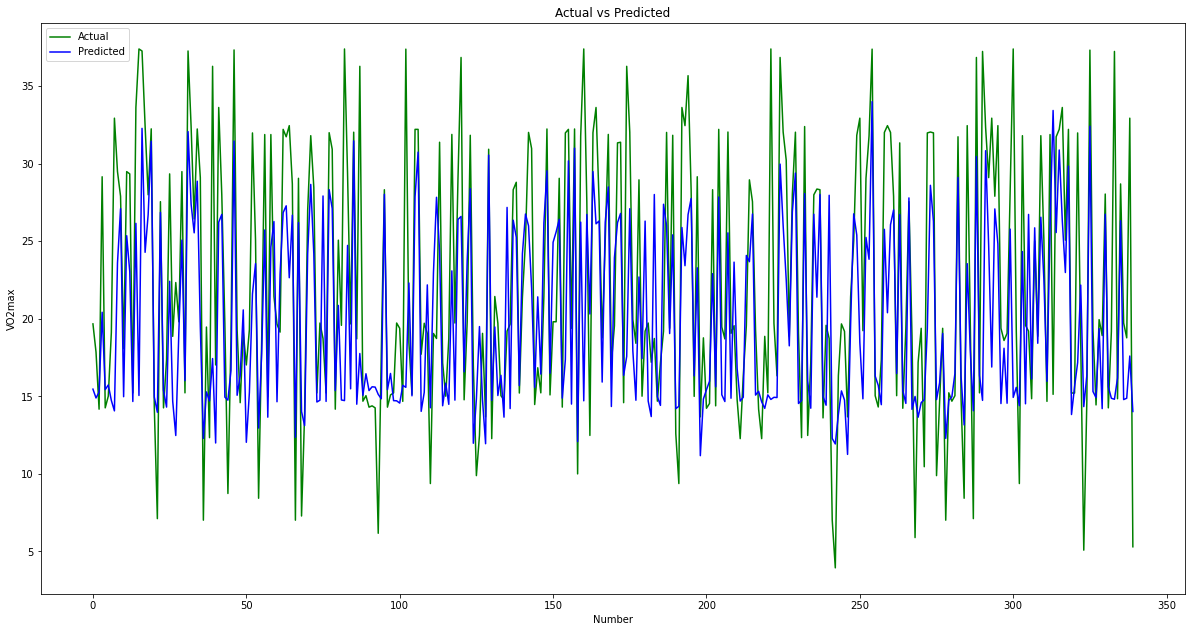

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.plot(TTest,color='green',label='Actual')
plt.plot(Y_hat,color='blue',label='Predicted')
plt.xlabel('Number')
plt.ylabel('VO2max')
plt.title('Actual vs Predicted')
plt.legend()
#plt.figure(figsize=(100,100))

#plt.show()
fig = plt.gcf()
fig.set_size_inches(20.5, 10.5)
fig.savefig('test2png.png', dpi=150)